## Supplement 3: Regression

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

### 3.2 Programming Task: Gradient Descent
Consider the function $J(\boldsymbol{w})=J(w_1, w_2) =-e^{-\frac{1}{100}(w_1^2 + w_2^2 -w_1w_2 - 2w_1  + 4w_2 + 5)} - 2 e^{-(w_1^2  + w_2^2  - 4w_1- 9 w_2 + 25)}.$

i\. Plot $J(\boldsymbol{w})$ as a function of $\boldsymbol{w}$ using the contour plot using the Matplotlib module. 

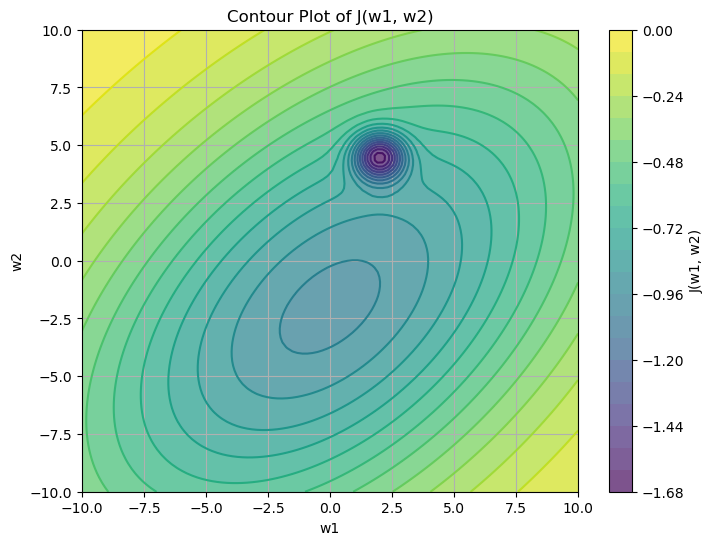

In [47]:
# TODO: Define function J(w)
def J(w1,w2) :
    term1 = -np.exp(-1/100 * (w1**2 + w2**2 - w1*w2 - 2*w1 + 4*w2 + 5))
    term2 = -2 * np.exp(-(w1**2 + w2**2 - 4*w1 - 9*w2 + 25))
    return (term1 + term2)

# TODO: Prepare contours plot of J(w)

w1 = np.linspace(-10, 10, 100)
w2 = np.linspace(-10, 10, 100)
W1, W2 = np.meshgrid(w1, w2)

# Evaluate the function on the grid
Z = J(W1, W2)

# Create the contour plot
plt.figure(figsize=(8, 6))
contour = plt.contour(W1, W2, Z, levels=20, cmap='viridis')
plt.contourf(W1, W2, Z, levels=20, cmap='viridis', alpha=0.7)
plt.colorbar(label='J(w1, w2)')
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('Contour Plot of J(w1, w2)')
plt.grid()
plt.show()


ii\. Obtain the gradient of the above function by hand.
            
  $Hint:   \nabla J(\boldsymbol{w}) = \left(
  \begin{array}{c}
    \frac{\partial J(\boldsymbol{w})}{\partial w_1} \\ %
    \frac{\partial J(\boldsymbol{w})}{\partial w_2}
  \end{array} \right)
$

iii\. Implement gradient descent algorithm described in the lecture to find the minimum of this
            function using the NumPy module. Plot the location of the new $\boldsymbol{w}$ after each iteration on the contour plot.

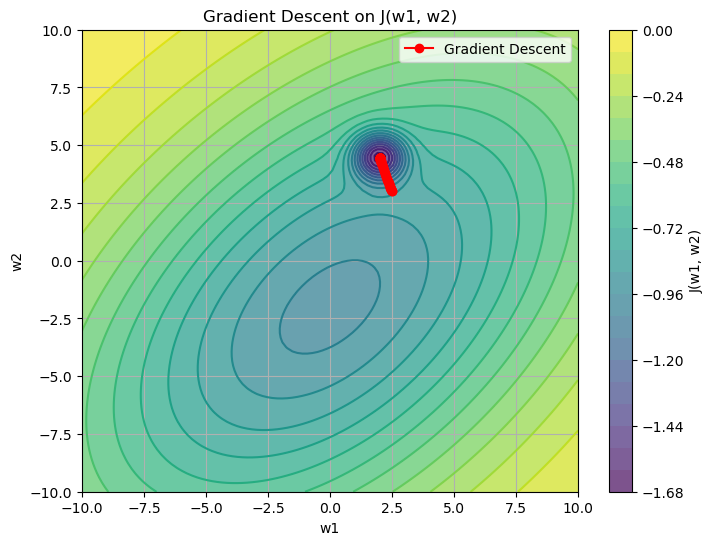

In [55]:
# TODO: Define function gradient_J(w)
def grad_J(w1, w2):
    grad_w1 = (1/100 * (2*w1 - w2 - 2) * np.exp(-1/100 * (w1**2 + w2**2 - w1*w2 - 2*w1 + 4*w2 + 5))
               + 4 * (w1 - 2) * np.exp(-(w1**2 + w2**2 - 4*w1 - 9*w2 + 25)))
    grad_w2 = (1/100 * (2*w2 - w1 + 4) * np.exp(-1/100 * (w1**2 + w2**2 - w1*w2 - 2*w1 + 4*w2 + 5))
               + 2 * (2*w2 - 9) * np.exp(-(w1**2 + w2**2 - 4*w1 - 9*w2 + 25)))
    return np.array([grad_w1, grad_w2])

# TODO: Define the gradient descent algorithm as function
# Store each update of w in an array to make plot later.
def gd_algorithm(lr,max_i,weights):
    w = np.array(weights)
    w_list = []
    for _ in range(max_i):
        gradient_w = grad_J(w[0],w[1])
        w -= lr * gradient_w
        w_list.append(w.copy())
        
    return np.array(w_list) 
        
     

# TODO: Train w 
weight_trajectory = gd_algorithm(lr=0.1, max_i = 1000, weights = (2.5,3.0))

# TODO: Prepare contour plot and mark each weight update on the plot.

plt.figure(figsize=(8, 6))
contour = plt.contour(W1, W2, Z, levels=20, cmap='viridis')
plt.contourf(W1, W2, Z, levels=20, cmap='viridis', alpha=0.7)
plt.colorbar(label='J(w1, w2)')
plt.plot(weight_trajectory[:, 0], weight_trajectory[:, 1], 'r-o',label="Gradient Descent")
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('Gradient Descent on J(w1, w2)')
plt.legend()
plt.grid()
plt.show()







### 3.3 Programming Task: Housing Price Regression Problem
The file __house\_prices.txt__ contains a data set of house prices: the
first column is the house size in square feet, the second column is the number
of bedrooms, the third column is the price in USD.


i\. Plot house prices vs. house sizes as a scatter plot.

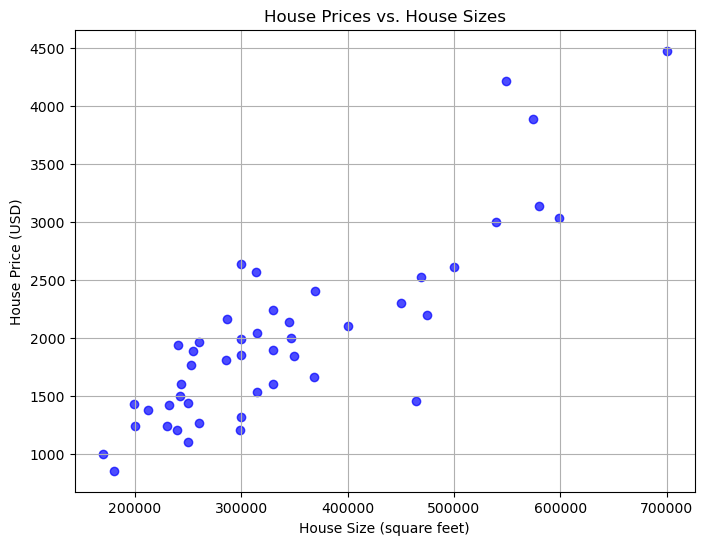

In [5]:
# TODO: Read and prepare scatter plot

data = np.loadtxt('house_prices.txt', delimiter =',')
price = data[:,2]
size = data[:,0]

plt.figure(figsize=(8, 6))
plt.scatter(price, size, color='blue', alpha=0.7)
plt.xlabel('House Size (square feet)')
plt.ylabel('House Price (USD)')
plt.title('House Prices vs. House Sizes')
plt.grid(True)
plt.show()



ii\. Next, fit the linear regression to these data points. You should not use
    any other python module besides NumPy to find the weights of the model.

* Consider the linear model $h_{\boldsymbol{w}}(\boldsymbol{x})=w_0 x_0 + w_1 x_1={\boldsymbol{w}}^\top\boldsymbol{x}$,
    where $x_1$ is the house size in the first column of __house\_prices.txt__, $x_0=1$ by convention, $\boldsymbol{x}={[x_0,x_1]}^\top$, 
    and $\boldsymbol{w}={[w_0, w_1]}^\top$. Define the cost function on the dataset:
 
    $J(\boldsymbol{w})=\frac{1}{2}\sum_{i=1}^{n} \left(h_{\boldsymbol{w}}(\boldsymbol{x}^{(i)})-y^{(i)}\right)^2.$

 
    Above, $n$ is the number of rows in __house_prices.txt__, $y^{(i)}$
    is the house price given in the third column of the file, $\boldsymbol{x}^{(i)} = {[1\
    x_1^{(i)}]}$ and $x_1^{(i)}$ is the house size from the first column and
    $i$th row of the file. $h_{\boldsymbol{w}}(\cdot)$ represents the linear regression model. Plot $J(\boldsymbol{w})$ as a function of $\boldsymbol{w}$ using the contour
    plot. You may rescale the data if required. 

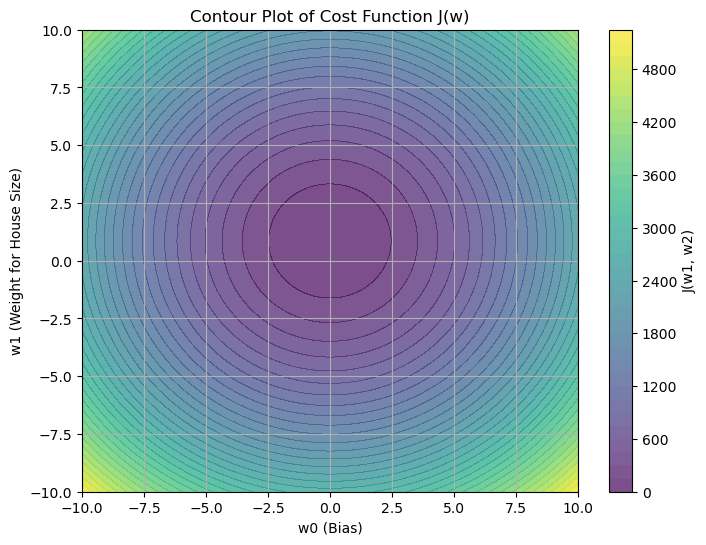

In [57]:
# TODO: Define function J(w)
def J(w0,w1,X,y) :
    W = np.array([w0,w1])
    predictions = X @ W
    r = predictions - y
    cost = 0.5*np.sum(r **2)
    return cost


# TODO: Define function gradient_J(w)
def grad_J_2(w, X, y):
    predictions = X @ w
    errors = predictions - y  
    return X.T @ errors 

size = (size - np.mean(size)) / np.std(size)
price = (price - np.mean(price)) / np.std(price)
X= np.vstack([np.ones(len(size)), size]).T # add bias
y = price
# TODO: Plot the cost function
w0_vals = np.linspace(-10, 10, 100)
w1_vals = np.linspace(-10, 10, 100)
W0, W1 = np.meshgrid(w0_vals, w1_vals)


# Evaluate the cost function on the grid
J_vals = np.zeros_like(W0)
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        J_vals[i, j] = J(W0[i, j], W1[i, j], X, y)

# Plot the cost function as a contour plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(W0, W1, J_vals, levels=50, cmap='viridis',alpha=0.7)
plt.colorbar(label='J(w1, w2)')
plt.title('Contour Plot of Cost Function J(w)')
plt.xlabel('w0 (Bias)')
plt.ylabel('w1 (Weight for House Size)')
plt.grid()
plt.show()

* Start with some initial value $\boldsymbol{w}$
and run the steps of the gradient descent algorithm (you may reuse revelant
parts of the solution from task 3.2). Plot the location of each new $\boldsymbol{w}$ on
the contour plot similar to the previous task.

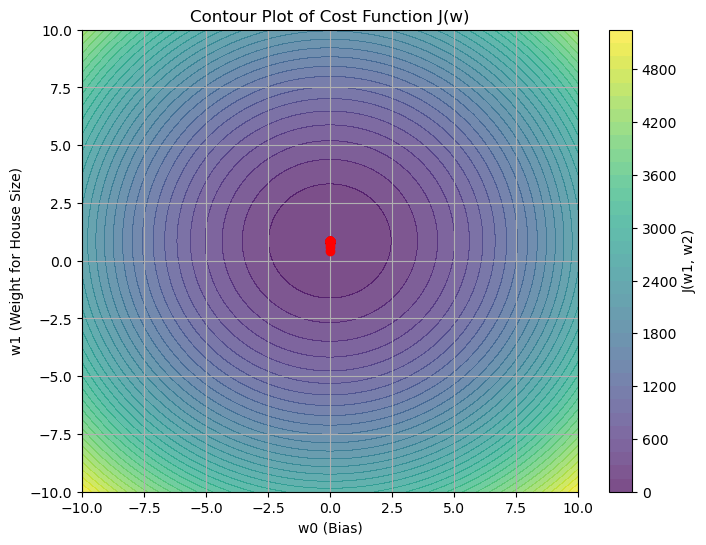

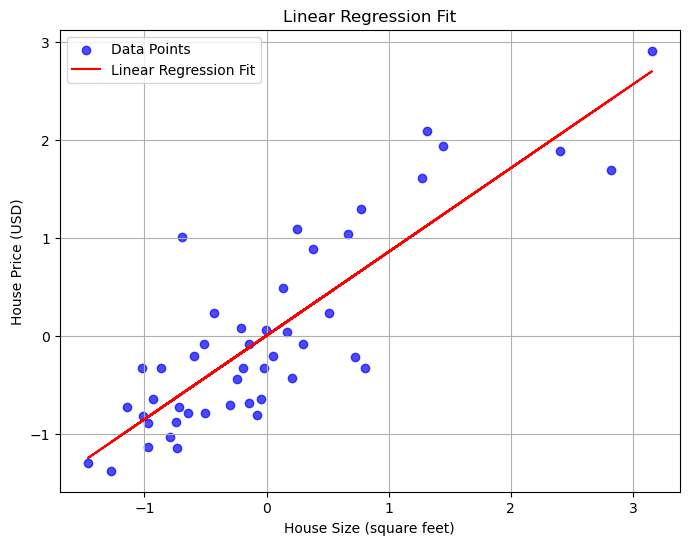

In [58]:

def gd_algorithm_2(lr,max_i,weights,X,y):
    w = np.array(weights)
    w_list = []
    for _ in range(max_i):
        gradient_w = grad_J_2(w,X,y)
        w -= lr * gradient_w
        w_list.append(w.copy())
        
    return np.array(w_list) 

# Training with gradient descent
weights = [0.0, 0.0]  # Start with initial weights w0=0, w1=0
lr = 0.01
max_i = 50
weight_trajectory = gd_algorithm_2(lr, max_i, weights, X, y)

# Plotting the contour of the cost function
plt.figure(figsize=(8, 6))
contour = plt.contourf(W0, W1, J_vals, levels=50, cmap='viridis',alpha=0.7)
plt.plot(weight_trajectory[:, 0], weight_trajectory[:, 1], 'r-o', label='Gradient Descent Path')
plt.colorbar(label='J(w1, w2)')
plt.title('Contour Plot of Cost Function J(w)')
plt.xlabel('w0 (Bias)')
plt.ylabel('w1 (Weight for House Size)')
plt.grid()
plt.show()

# Mark the trajectory of gradient descent on the contour plot

# OPTIONAL: Plot the resulting linear regression function
# Compute predictions with the final weights

predictions = X @ weight_trajectory[-1]

plt.figure(figsize=(8, 6))
plt.scatter(size * np.std(size) + np.mean(size), 
            price * np.std(price) + np.mean(price), 
            label='Data Points', color='blue', alpha=0.7)
plt.plot(size * np.std(size) + np.mean(size), 
         predictions * np.std(price) + np.mean(price), 
         color='red', label='Linear Regression Fit')
plt.xlabel('House Size (square feet)')
plt.ylabel('House Price (USD)')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid()
plt.show()


* Experiment by making changes to the learning rate of the gradient descent
algorithm. Observe how the path of the algorithm changes. Make sure that the
algorithm converges to the true minimum of the function $J(\boldsymbol{w})$.

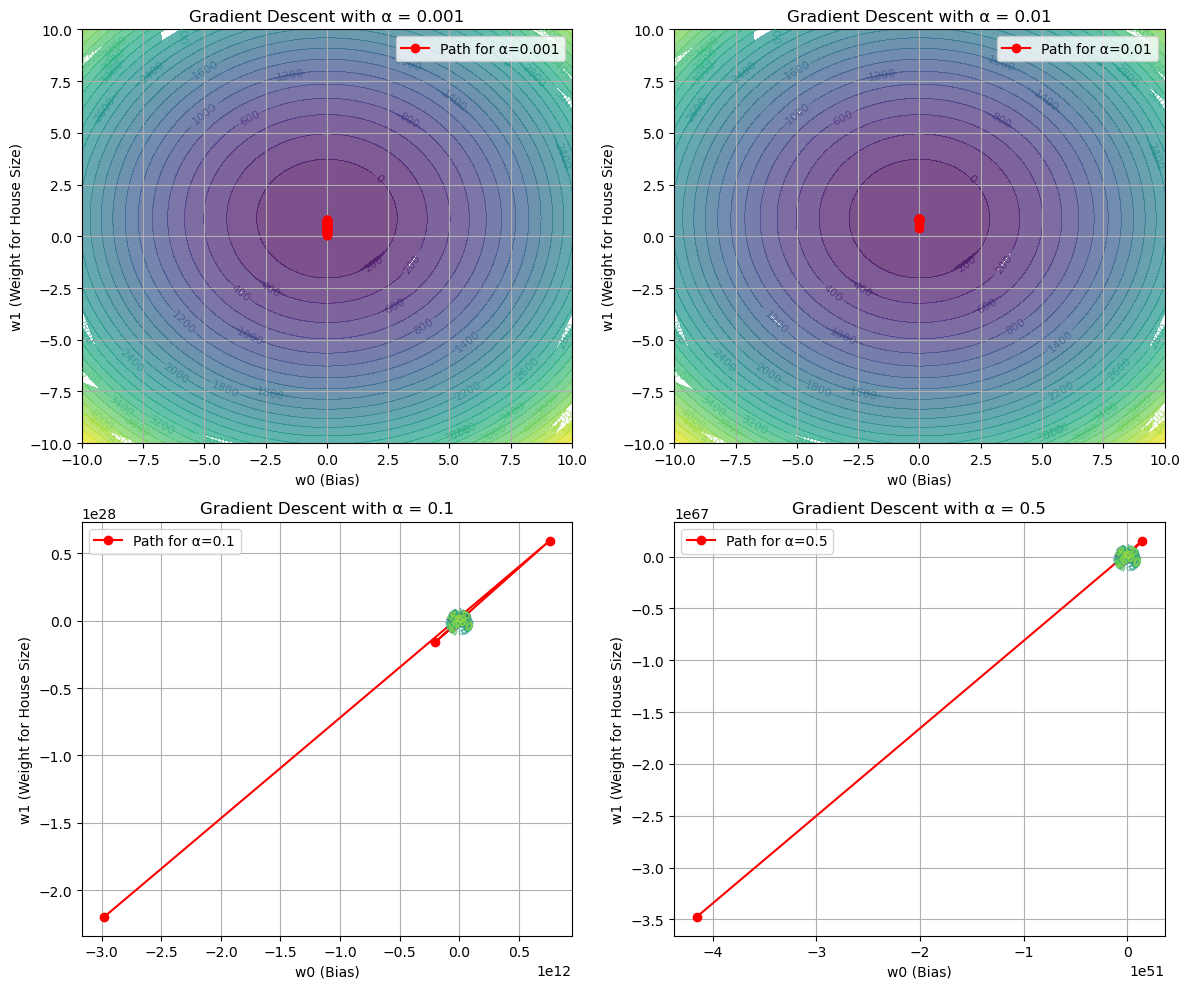

 lower alpha takes longer time to converge, which means it needed more step. but if we increase alpha, at some point it starts to diverse


In [59]:
# Define a list of learning rates to test
lrs = [0.001, 0.01, 0.1, 0.5]  # Different learning rates (α values)

# Set up the subplots for displaying the results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid for 4 learning rates
# Loop over each learning rate and run gradient descent
for i, lr in enumerate(lrs):
    ax = axes[i // 2, i % 2]  # Access subplot by row and column index    
    # Run gradient descent for each alpha value
    weight_trajectory = gd_algorithm_2(lr, max_i, weights, X, y)
    # Plot contour of the cost function J(w)
    contour = ax.contourf(W0, W1, J_vals, levels=30, cmap='viridis',alpha =0.7)
    ax.clabel(contour, inline=True, fontsize=8)
    ax.plot(weight_trajectory[:, 0], weight_trajectory[:, 1], 'r-o', label=f'Path for α={lr}')
    ax.set_title(f'Gradient Descent with α = {lr}')
    ax.set_xlabel('w0 (Bias)')
    ax.set_ylabel('w1 (Weight for House Size)')
    ax.grid(True)
    ax.legend()


# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

print( " lower alpha takes longer time to converge, which means it needed more step. but if we increase alpha, at some point it starts to diverse")


iii\. Determine the weights of the model using the closed form solution for $\boldsymbol{w}$:
\begin{align}
    \hat{\mathbf{w}} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^Ty
\end{align}
Above, $\mathbf{y} = [y^{(1)},..., y^{(n)}]^T$ and $\mathbf{X}$ is the data matrix whose rows are $x^{(i)}$. Is this the same point that you have found above using gradient descent?

In [28]:
# TODO: Compute the closed form solution

# Compute the closed-form solution for weights
neq_w = np.linalg.inv(X.T @ X) @ X.T @ price
print(f"Closed-Form Weights: w0 = {neq_w[0]:.4f}, w1 = {neq_w[1]:.4f}")


Closed-Form Weights: w0 = 0.0000, w1 = 0.8550
